## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

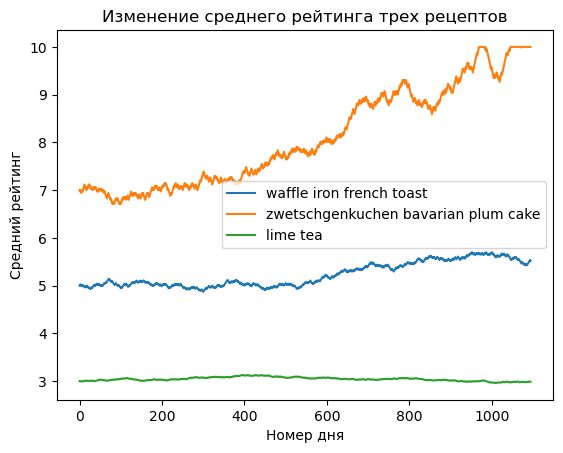

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ratings_data = np.load('average_ratings.npy')

recipe_names = [
    "waffle iron french toast",
    "zwetschgenkuchen bavarian plum cake",
    "lime tea"
]

for i in range(len(recipe_names)):
    plt.plot(ratings_data[i], label=recipe_names[i])
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')
plt.legend()
plt.show()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


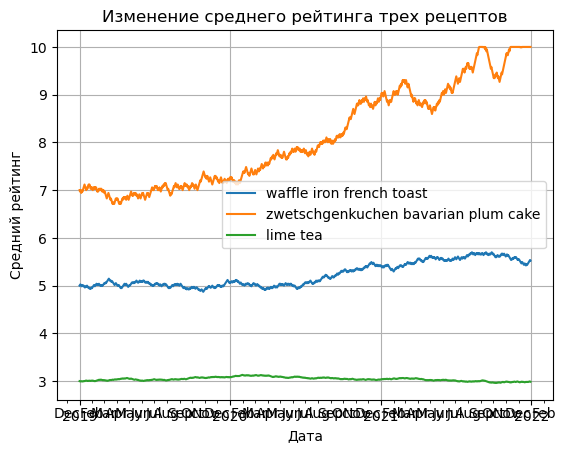

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

ratings_data = np.load('average_ratings.npy')

recipe_names = [
    "waffle iron french toast",
    "zwetschgenkuchen bavarian plum cake",
    "lime tea"
]

start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 30)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

for i in range(len(recipe_names)):
    plt.plot(date_range, ratings_data[i], label=recipe_names[i])

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

plt.grid(True)
plt.legend()

plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

plt.show()


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

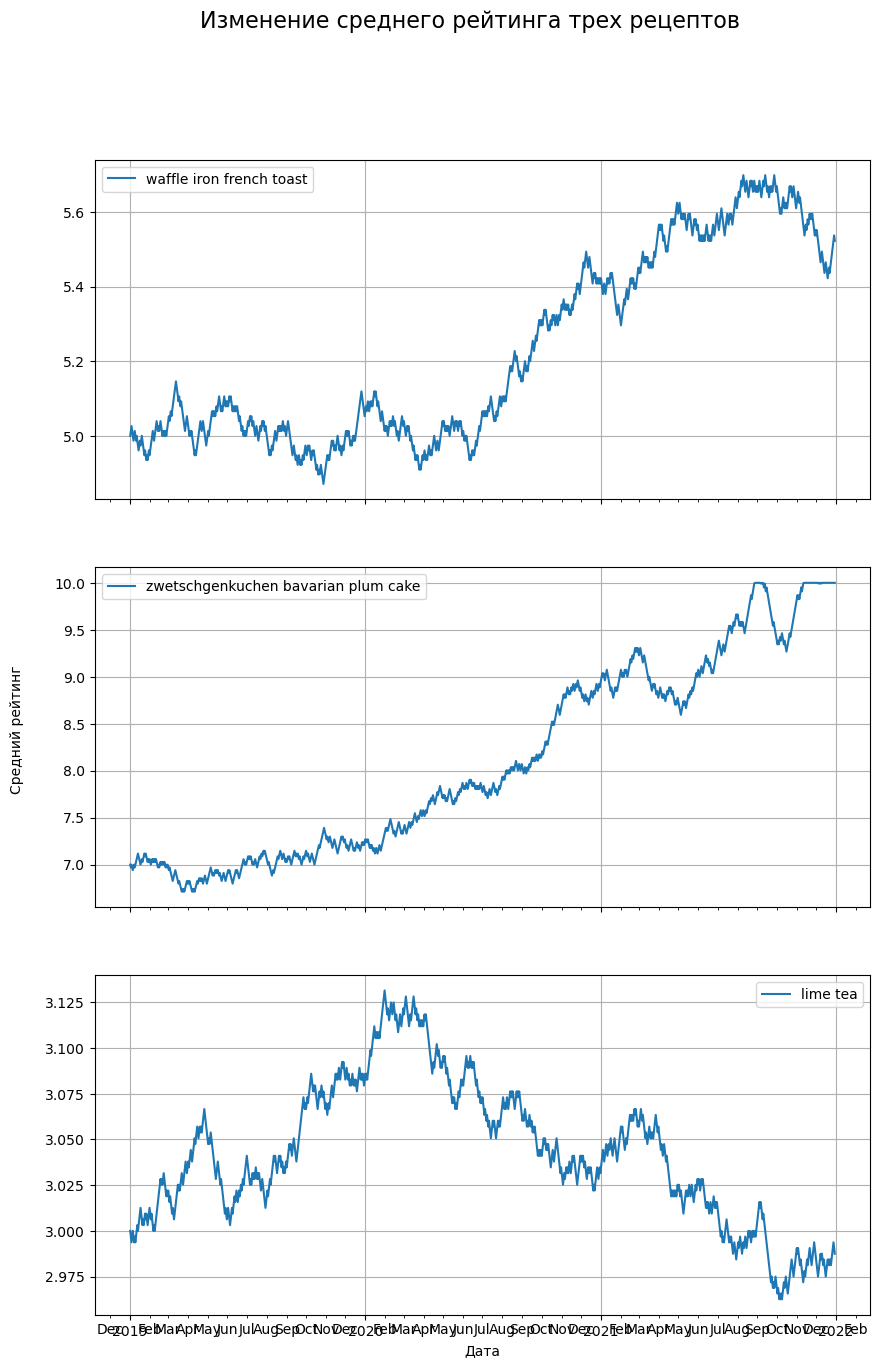

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

ratings_data = np.load('average_ratings.npy')

recipe_names = [
    "waffle iron french toast",
    "zwetschgenkuchen bavarian plum cake",
    "lime tea"
]

start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 30)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for i in range(len(recipe_names)):
    axs[i].plot(date_range, ratings_data[i], label=recipe_names[i])

    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_minor_locator(mdates.MonthLocator())
    
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axs[i].xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

    axs[i].grid(True)
    axs[i].legend()

plt.xlabel('Дата')
fig.text(0.04, 0.5, 'Средний рейтинг', va='center', rotation='vertical')
fig.suptitle('Изменение среднего рейтинга трех рецептов', fontsize=16)

plt.show()


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


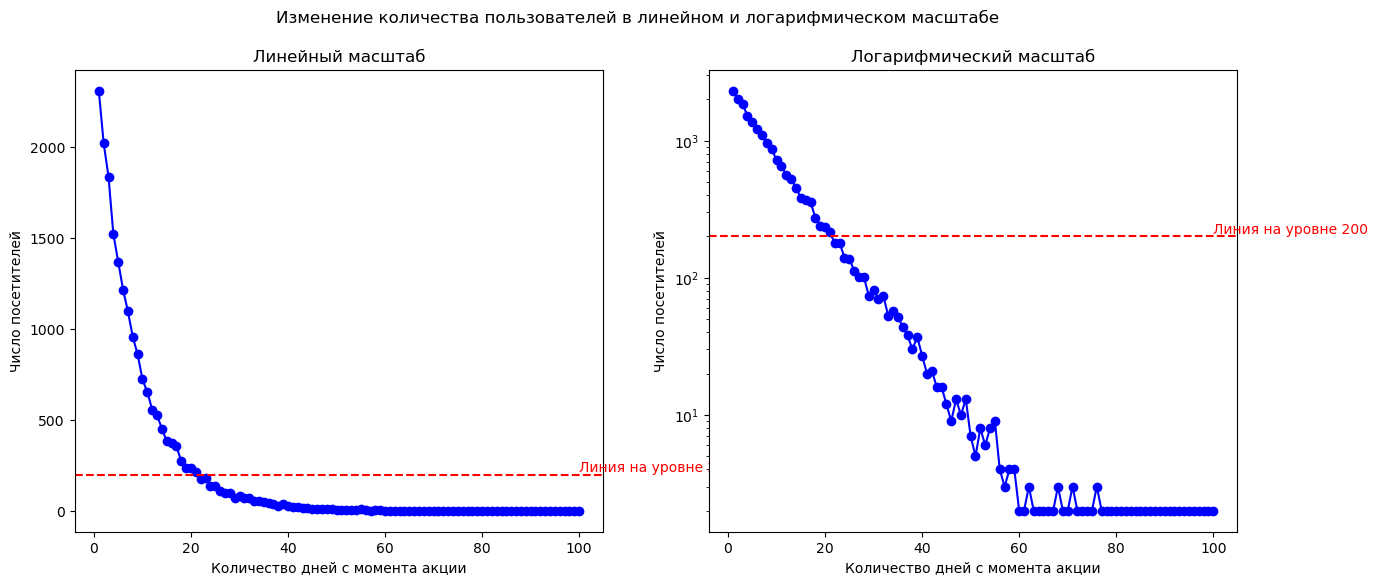

In [8]:
import numpy as np
import matplotlib.pyplot as plt

visitors_data = np.load('visitors.npy')

days = np.arange(1, len(visitors_data) + 1)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(days, visitors_data, color='blue', marker='o', linestyle='-')
axs[0].set_title('Линейный масштаб')
axs[0].set_xlabel('Количество дней с момента акции')
axs[0].set_ylabel('Число посетителей')

axs[0].axhline(y=200, color='red', linestyle='--', label='Линия на уровне 200')
axs[0].text(days[-1], 200, 'Линия на уровне 200', color='red', verticalalignment='bottom')

axs[1].plot(days, visitors_data, color='blue', marker='o', linestyle='-')
axs[1].set_yscale('log')
axs[1].set_title('Логарифмический масштаб')
axs[1].set_xlabel('Количество дней с момента акции')
axs[1].set_ylabel('Число посетителей')

axs[1].axhline(y=200, color='red', linestyle='--', label='Линия на уровне 200')
axs[1].text(days[-1], 200, 'Линия на уровне 200', color='red', verticalalignment='bottom')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

plt.show()


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
reviews = ...
recipes = ...

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

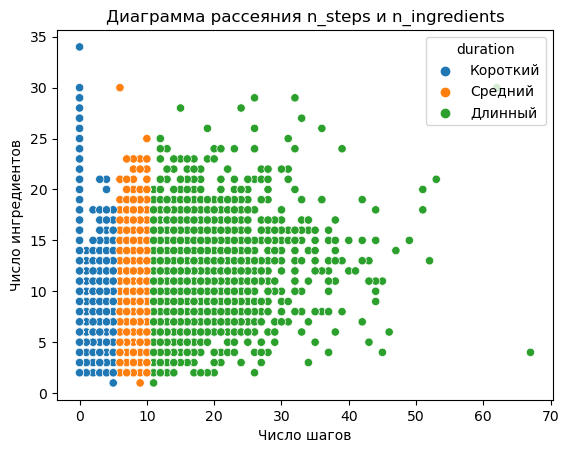

In [10]:
import seaborn as sns
import pandas as pd

recipes = pd.read_csv('recipes_sample.csv')

recipes['n_steps'] = recipes['n_steps'].fillna(0)

def categorize_duration(n_steps):
    if n_steps <= 5:
        return 'Короткий'
    elif n_steps <= 10:
        return 'Средний'
    else:
        return 'Длинный'

recipes['duration'] = recipes['n_steps'].apply(categorize_duration)

sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='duration')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.xlabel('Число шагов')
plt.ylabel('Число ингредиентов')
plt.show()


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файлов recipes_sample.csv и reviews_sample.csv
recipes = pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv')

# Объединение таблиц по столбцу 'id'
merged_df = pd.merge(recipes, reviews, on='id')

# Выбор интересующих столбцов
selected_columns = ['minutes', 'n_steps', 'n_ingredients', 'rating']
correlation_matrix = merged_df[selected_columns].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()

KeyError: 'id'